## FINALMENTE UTILIZAR?

Realizará comparación entre 2 versiones de un dataset, identificando las etiquetas faltantes y posibles cambios

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 as cv

In [8]:
labels_file = './Format test/3.5m.v1i.yolov8/train/labels/209_101_24_JPG.rf.06d96b5dd077c1dd3f2b2bae6fb51c02.txt'
image_file = './Format test/3.5m.v1i.yolov8/train/images/209_101_24_JPG.rf.06d96b5dd077c1dd3f2b2bae6fb51c02.jpg'

In [9]:
with open(labels_file, 'r') as file:
    lines = file.readlines()
    lines = [line.strip() for line in lines]
    labels = [line.split() for line in lines]

In [10]:
# Convierte de string a int/float
labels = [[int(value) if i == 0 else float(value) 
                for i, value in enumerate(label)] for label in labels]

class_id | x_center | y_center | width | height (normalized values)

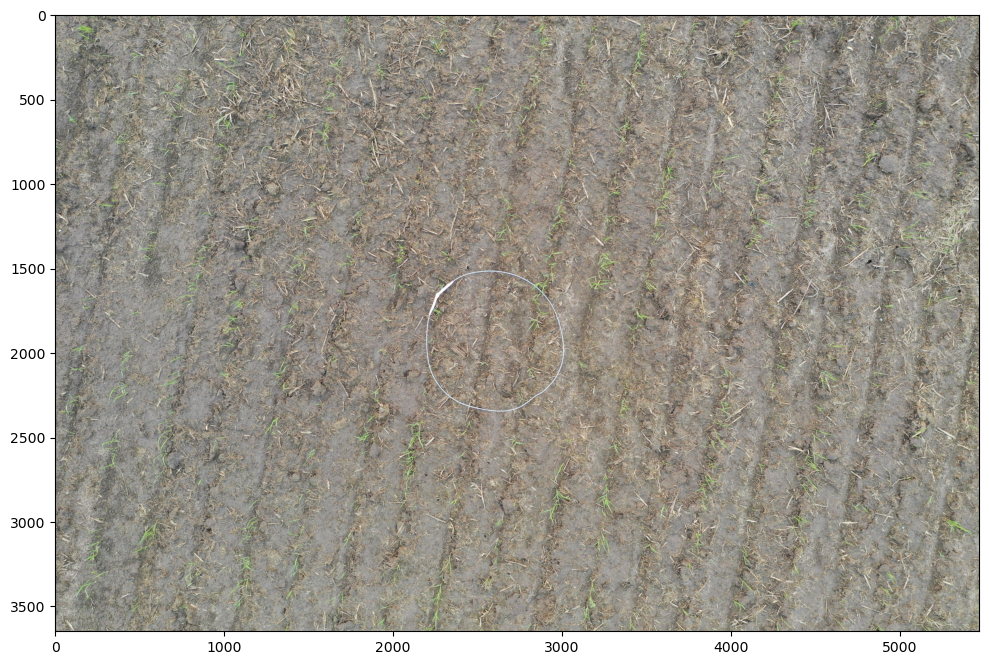

In [11]:
image = cv.imread(image_file)

im = cv.cvtColor(image, cv.COLOR_BGR2RGB)
fig = plt.figure(figsize=(12,8))
plt.imshow(im)
plt.show()

In [12]:
im.shape

(3648, 5472, 3)

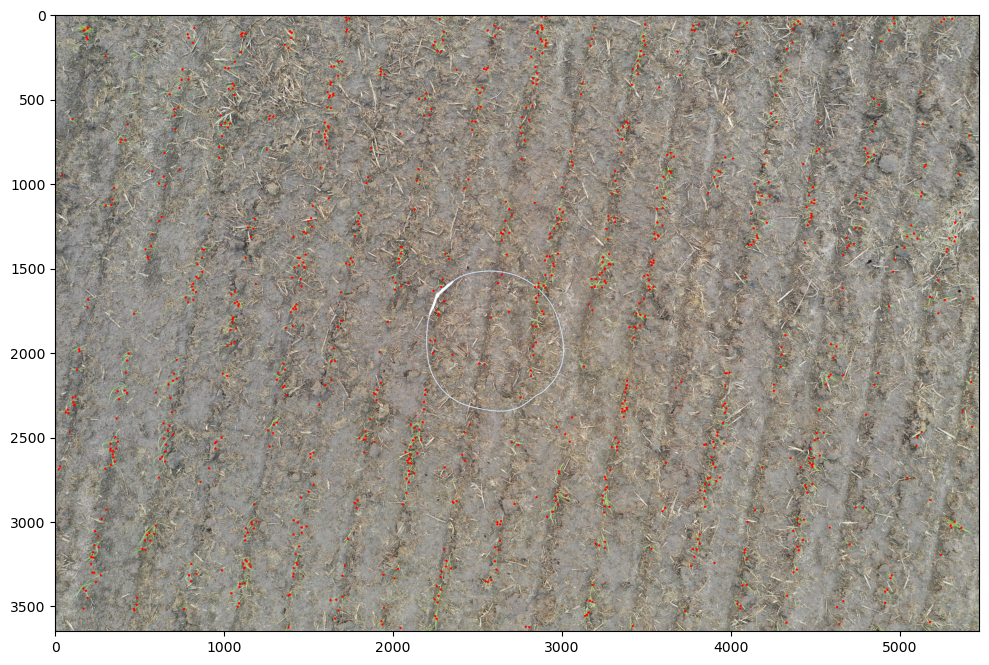

In [19]:
im_points = im.copy()
im_height, im_width, _ = im_points.shape
points = np.zeros((im_height, im_width, 3), dtype=np.uint8) #crea un fondo negro

# Draw points
for label in labels:
    x = 0
    y = 0
    for i, value in enumerate(label):
        if i == 1:
            x = round(value * im_width)
        elif i == 2:
            y = round(value * im_height)
    point = [x, y]
    cv.circle(im_points, center=point, radius=7, color=(255, 0, 0), thickness=-1)
    cv.circle(points, center=point, radius=10, color=(255, 255, 255), thickness=-1)

# Show image
fig = plt.figure(figsize=(12,8))
plt.imshow(im_points)
plt.show()

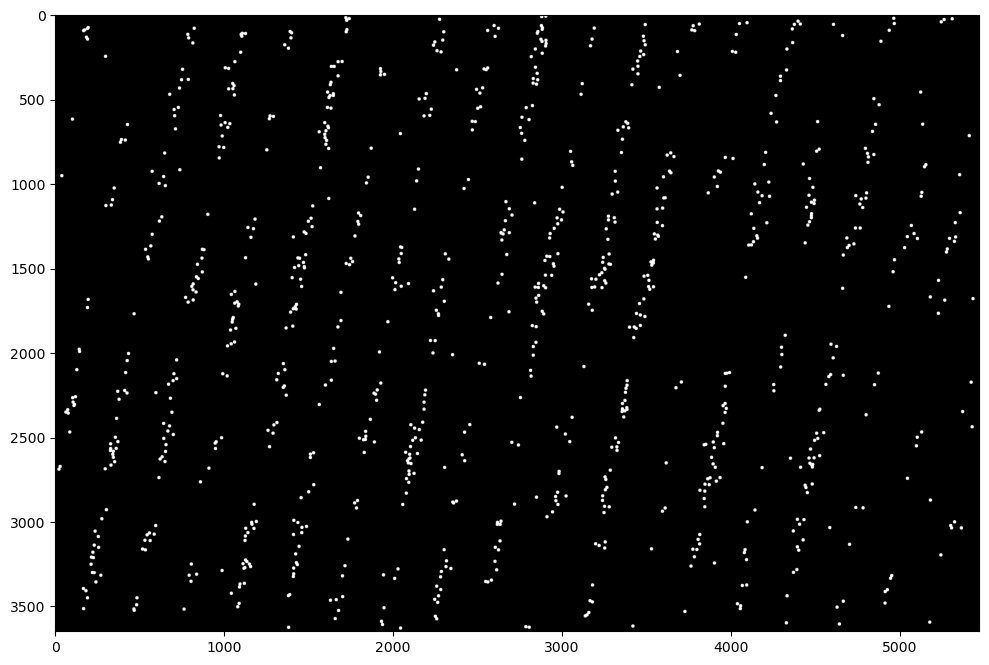

In [14]:
fig = plt.figure(figsize=(12,8))
plt.imshow(points)
plt.show()

In [15]:
# Guardar como imagen
cv.imwrite('label_points.jpg', points)

True